In [1]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix, csr_matrix
from pyrecode.recode_reader import ReCoDeReader
import pims
import imageio
import time

### Files

In [4]:
_data_folder = '/scratch/loh/abhik/28-Feb-2010/300Kmag_300fps_NoCorrection_Lattice'
_tag = '300kmag_300fps'
intermediate_file_name = os.path.join(_data_folder, _tag + '.rc1_part000')

### Check the File Header

In [5]:
reader = ReCoDeReader(intermediate_file_name, is_intermediate=True)
reader.open()
frames = {}
nz = reader._get_shape()[0]
nx = reader._get_shape()[1]
ny = reader._get_shape()[2]
reader._rc_header.print()
reader.close()

uid = 255
version_major = 0
version_minor = 1
reduction_level = 1
recode_operation_mode = 1
bit_depth = 12
nx = 1024
ny = 1024
nz = 691
L2_statistics = 0
L4_centroiding = 0
compression_scheme = 0
compression_level = 1
source_file_type = 2
source_header_length = 0
source_header_position = 1
source_file_name = 300kmag_300fps                                                                                      
dark_file_name = _dark_ref_2.bin                                                                                     
dark_threshold_epsilon = 0
has_dark_data = 1
frame_offset = 0
dark_frame_offset = 0
num_dark_frames = 1
source_bit_depth = 12
checksum = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
futures = [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  96
 141 150 237 209   2   0   0  96]


### View the sum of first N frames

482.141489982605


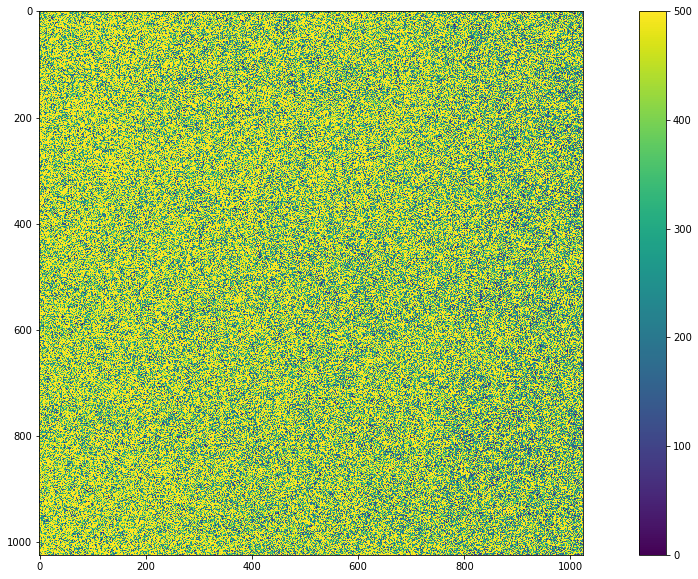

In [8]:
N = 150

reader = ReCoDeReader(intermediate_file_name, is_intermediate=True)
reader.open()
frames = {}
nz = reader._get_shape()[0]
nx = reader._get_shape()[1]
ny = reader._get_shape()[2]
for index in range(200):
    d = reader._get_next_frame()
view = np.zeros((nx,ny))
for index in range(N):
    d = reader._get_next_frame()
    a = next(iter(d.values())).toarray()
    view = np.add(view, a)
print(np.sum(view)/(nx*1.0*ny*1.0))
fig, ax = plt.subplots(figsize=(20,10))
im = ax.imshow(view, vmax=500)
fig.colorbar(im)
plt.show()
reader.close()

### View dose fractionated frames

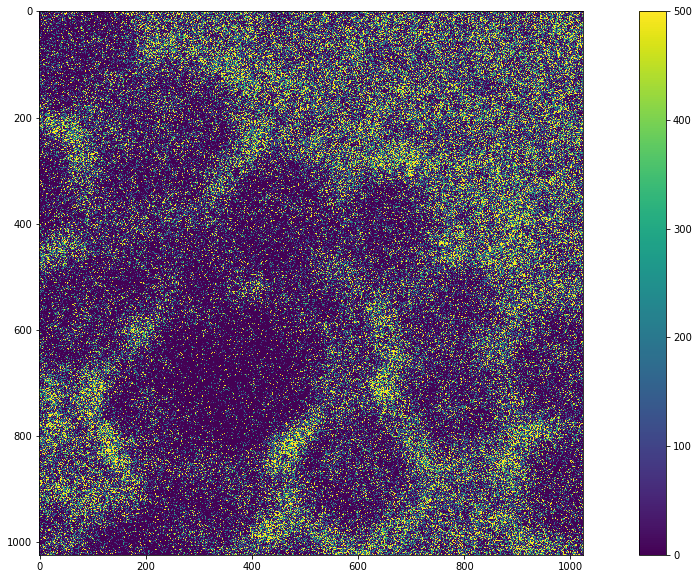

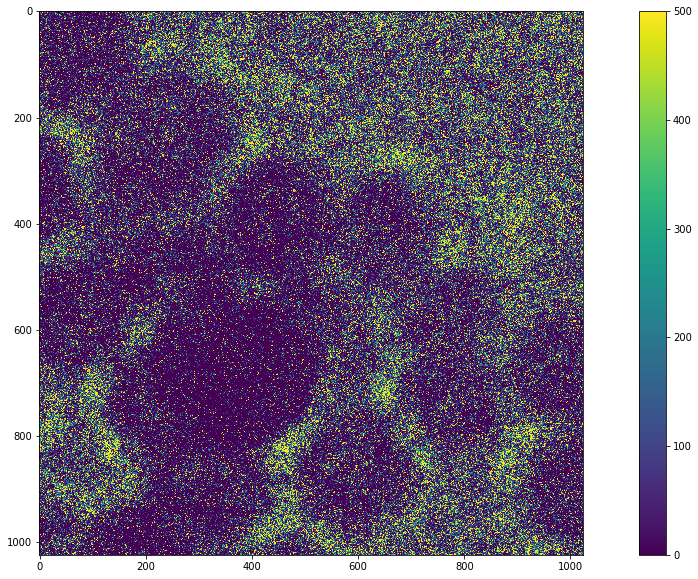

In [7]:
Nf = 2
df = 5

reader = ReCoDeReader(intermediate_file_name, is_intermediate=True)
reader.open()
frames = {}
nz = reader._get_shape()[0]
nx = reader._get_shape()[1]
ny = reader._get_shape()[2]
for i in range(0,df*Nf,df):
    view = np.zeros((nx,ny))
    for index in range(i,i+df):
        d = reader._get_next_frame()
        a = next(iter(d.values())).toarray()
        view = np.add(view, a)
    fig, ax = plt.subplots(figsize=(20,10))
    im = ax.imshow(view, vmax=500)
    fig.colorbar(im)
    plt.show()
reader.close()